In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('../../src/data/city_growth_models/small-african_cities_built_up_area.csv')

In [3]:
df 

,COU,Country,MEAS,Measure,Small subnational region,VAR,Variable,Year,Unit Code,Unit,Value
0,DZA,Algeria,SQKM,Square kilometers,Rehia,BUILT_UP_BEFORE,Area built-up before,1975,KM2,Square kilometres,0.000000
1,DZA,Algeria,SQKM,Square kilometers,Rehia,BUILT_UP_BEFORE,Area built-up before,1990,KM2,Square kilometres,0.009900
2,DZA,Algeria,SQKM,Square kilometers,Rehia,BUILT_UP_BEFORE,Area built-up before,2000,KM2,Square kilometres,0.017100
3,DZA,Algeria,SQKM,Square kilometers,Rehia,BUILT_UP_BEFORE,Area built-up before,2014,KM2,Square kilometres,0.024300
4,DZA,Algeria,SQKM,Square kilometers,Rehia,BUILT_UP_SINCE_1990,Built-up since 1990,2000,KM2,Square kilometres,0.007200
...,...,...,...,...,...,...,...,...,...,...,...
107856,SSD,South Sudan,PCNT,Percent of total land area,Al Mabien,BUILT_UP_SINCE_1990,Built-up since 1990,2014,PC,Percentage,0.000994
107857,SSD,South Sudan,PCNT,Percent of total land area,Al Mabien,BUILT_UP_SINCE_2000,Built-up since 2000,2014,PC,Percentage,0.000814
107858,SSD,South Sudan,PCNT,Percent of total land area,Tonga,BUILT_UP_SINCE_1990,Built-up since 1990,2000,PC,Percentage,0.051695
107859,SSD,South Sudan,PCNT,Percent of total land area,Tonga,BUILT_UP_SINCE_1990,Built-up since 1990,2014,PC,Percentage,0.089817


COU: Country code

Country: Name of the country

MEAS: Code for the measure

Measure: Name of the measure

Small subnational region: Name of the small subnational region within the country

VAR: Code for the variable

Variable: Name of the variable

Year: Year of the data

Unit Code: Code for the unit of measurement

Unit: Name of the unit of measurement

Value: Numeric value of the data

### Drop Columns

In [4]:
df = df.drop(columns=['COU','MEAS','Measure','VAR','Unit Code','Unit'],axis=1)

In [5]:
df

,Country,Small subnational region,Variable,Year,Value
0,Algeria,Rehia,Area built-up before,1975,0.000000
1,Algeria,Rehia,Area built-up before,1990,0.009900
2,Algeria,Rehia,Area built-up before,2000,0.017100
3,Algeria,Rehia,Area built-up before,2014,0.024300
4,Algeria,Rehia,Built-up since 1990,2000,0.007200
...,...,...,...,...,...
107856,South Sudan,Al Mabien,Built-up since 1990,2014,0.000994
107857,South Sudan,Al Mabien,Built-up since 2000,2014,0.000814
107858,South Sudan,Tonga,Built-up since 1990,2000,0.051695
107859,South Sudan,Tonga,Built-up since 1990,2014,0.089817


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107861 entries, 0 to 107860
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Country                   107861 non-null  object 
 1   Small subnational region  107861 non-null  object 
 2   Variable                  107861 non-null  object 
 3   Year                      107861 non-null  object 
 4   Value                     107672 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.1+ MB


In [7]:
df.describe()

,Value
count,107672.000000
mean,2.582070
std,11.766958
min,0.000000
25%,0.015674
50%,0.166082
75%,1.030625
max,641.367900


### Handling NaN values

In [8]:
df.isna().sum()

Country                       0
Small subnational region      0
Variable                      0
Year                          0
Value                       189
dtype: int64

In [9]:
import missingno as msno

<AxesSubplot:>

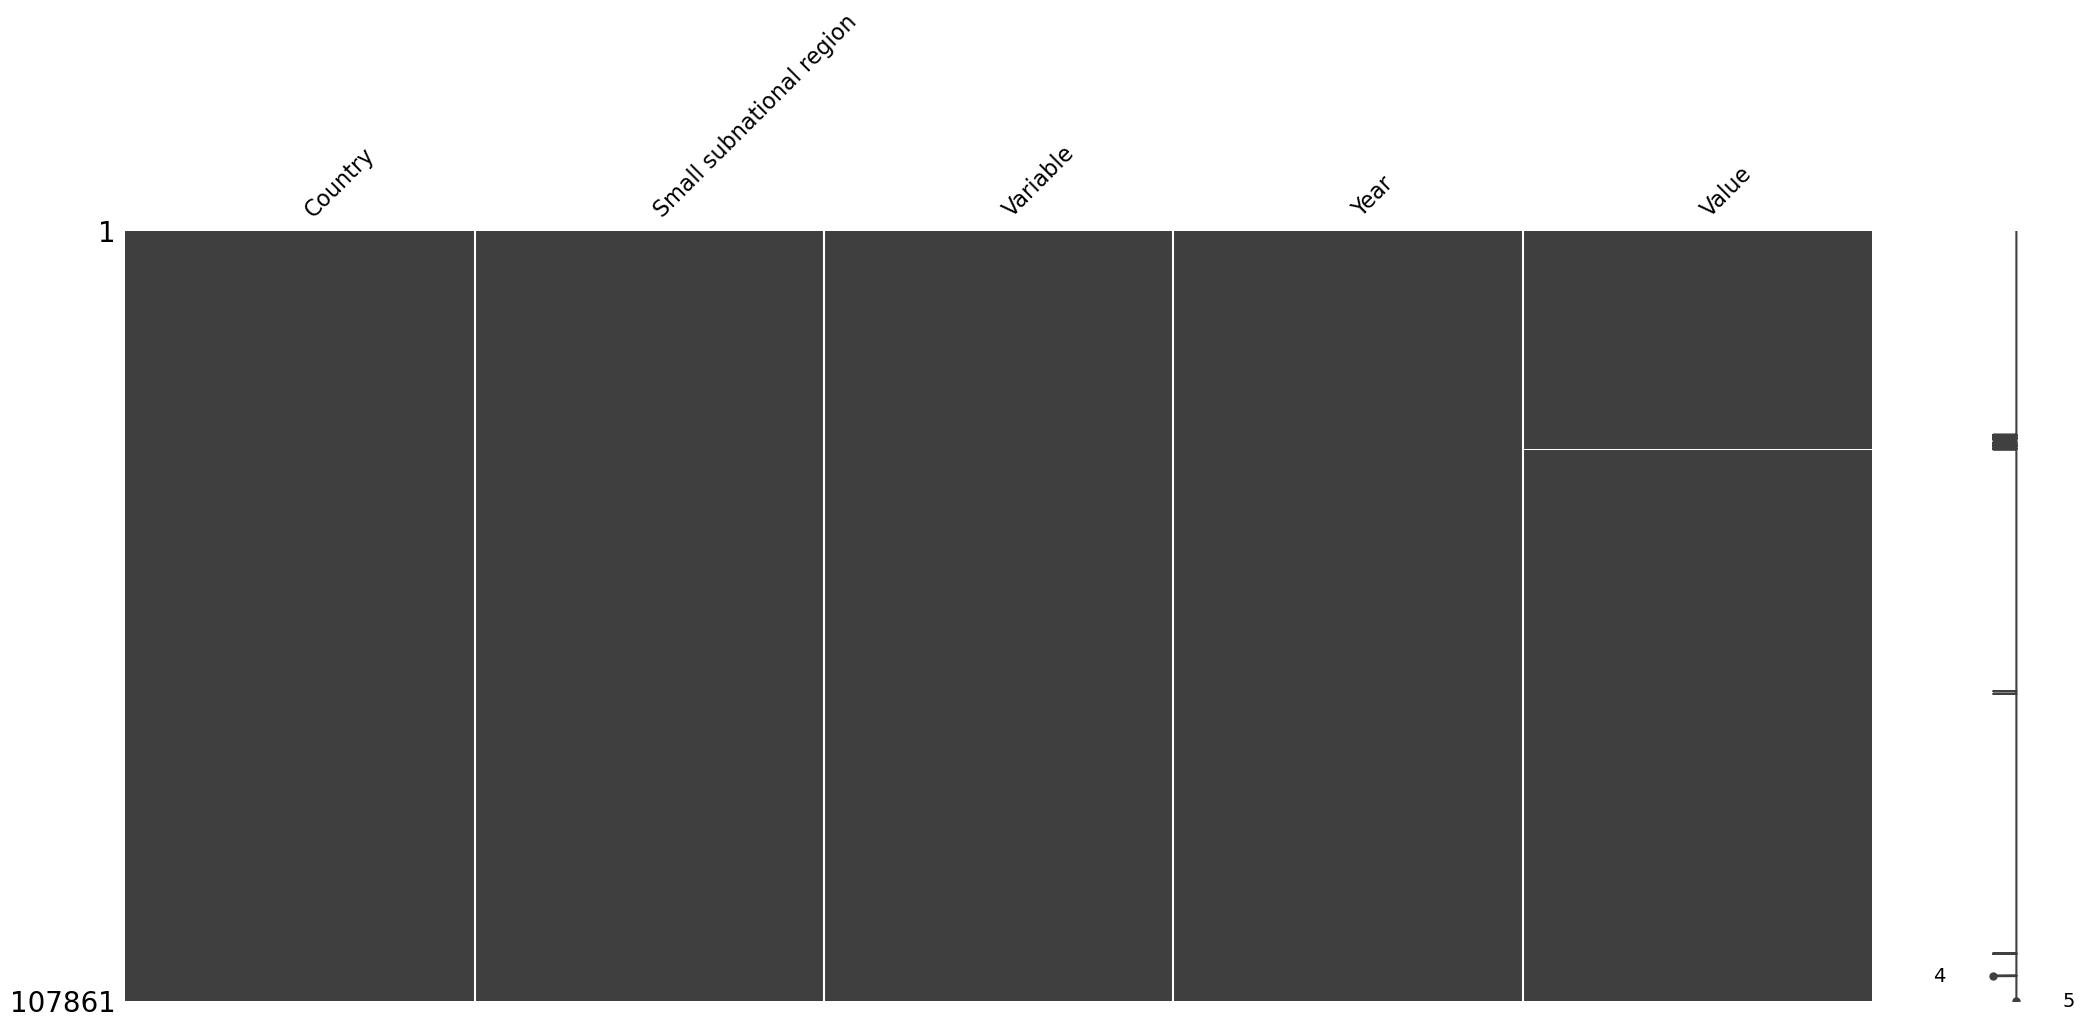

In [10]:
msno.matrix(df)

In [11]:
df.Value.value_counts()

0.000000    6695
0.000900     522
0.001800     480
0.002700     429
0.003600     362
            ... 
0.475144       1
0.029641       1
0.094077       1
0.017051       1
0.038122       1
Name: Value, Length: 59406, dtype: int64

In [12]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
cols_to_impute = ['Value']
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])


In [13]:
df.isna().sum()

Country                     0
Small subnational region    0
Variable                    0
Year                        0
Value                       0
dtype: int64

In [14]:
df

,Country,Small subnational region,Variable,Year,Value
0,Algeria,Rehia,Area built-up before,1975,0.000000
1,Algeria,Rehia,Area built-up before,1990,0.009900
2,Algeria,Rehia,Area built-up before,2000,0.017100
3,Algeria,Rehia,Area built-up before,2014,0.024300
4,Algeria,Rehia,Built-up since 1990,2000,0.007200
...,...,...,...,...,...
107856,South Sudan,Al Mabien,Built-up since 1990,2014,0.000994
107857,South Sudan,Al Mabien,Built-up since 2000,2014,0.000814
107858,South Sudan,Tonga,Built-up since 1990,2000,0.051695
107859,South Sudan,Tonga,Built-up since 1990,2014,0.089817
